In [1]:
import numpy as np
import matplotlib.pyplot as plt
from read_data import read_evrptw_data
from evrptw import EVRPTW
from moea import NSGA2, SPEA2
import json

In [2]:
with open('dataBVfinal.json', 'r', encoding="UTF-8") as file:
    data = json.load(file)

problem = EVRPTW(data)

# data, json_data = read_evrptw_data("evrptw_instances\\c101_21.txt")
# problem = EVRPTW(data)

In [3]:
def plot_evrp(evrp, routes=[], label=False):
    # Vẽ các điểm
    plt.figure(figsize=(8, 6))

    # Vẽ Depot
    depot_coords = evrp.coordinates[evrp.depot]
    plt.scatter(depot_coords[0], depot_coords[1], color='red', marker='D', label="Depot", s=30)  # Dùng D cho Depot

    # Vẽ Customers
    customer_coords_x = []
    customer_coords_y = []
    for customer_id in evrp.customer_ids:
        customer_coords = evrp.coordinates[customer_id]
        customer_coords_x.append(customer_coords[0])
        customer_coords_y.append(customer_coords[1])
    
    plt.scatter(customer_coords_x, customer_coords_y, color='blue', marker='o', label="Customer", s=30)

    # Vẽ Stations
    station_coords_x = []
    station_coords_y = []
    for station_id in evrp.station_ids:
        station_coords = evrp.coordinates[station_id]
        station_coords_x.append(station_coords[0])
        station_coords_y.append(station_coords[1])
        
    plt.scatter(station_coords_x, station_coords_y, color='green', marker='^', label="Station", s=30)

    for route in routes:
        # Đảm bảo rằng mỗi route bắt đầu và kết thúc tại Depot
        route_coords = [evrp.coordinates[evrp.depot]]  # Bắt đầu với Depot
        for node_id in route:
            route_coords.append(evrp.coordinates[node_id])  # Thêm các điểm vào route
        route_coords.append(evrp.coordinates[evrp.depot])  # Kết thúc với Depot

        # Vẽ các mũi tên
        route_coords = np.array(route_coords)
        for i in range(len(route_coords) - 1):
            start = route_coords[i]
            end = route_coords[i + 1]
            dx, dy = end[0] - start[0], end[1] - start[1]
            plt.quiver(start[0], start[1], dx, dy, angles='xy', scale_units='xy', scale=1, color="red", width=0.004)

    # Thêm nhãn cho các điểm
    if label==True:
        for customer_id in evrp.customer_ids:
            customer_coords = evrp.coordinates[customer_id]
            plt.text(customer_coords[0] + 0.2, customer_coords[1] + 0.2, f"{customer_id}", fontsize=9)

        for station_id in evrp.station_ids:
            station_coords = evrp.coordinates[station_id]
            plt.text(station_coords[0] + 0.2, station_coords[1] + 0.2, f"{station_id}", fontsize=9)

        plt.text(depot_coords[0] + 0.2, depot_coords[1] + 0.2, f"Depot", fontsize=9)


    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    if routes:
        plt.title("Routes for ECVRP-TW")
    else:
        plt.title("Depot, Customers, and Stations")
    plt.legend(loc="upper left")
    # plt.grid(True)

    plt.show()

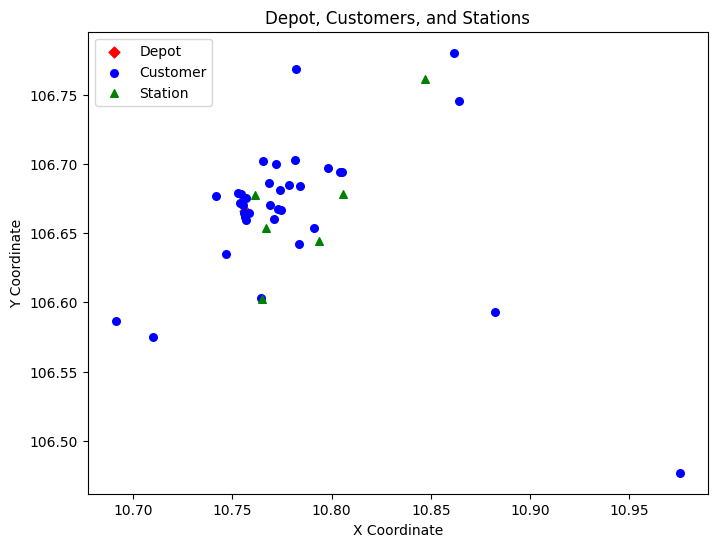

In [4]:
plot_evrp(problem, label=False)

In [59]:
solver_1 = NSGA2(problem, population_size=80, num_generations=90, crossover_rate=0.9, mutation_rate=0.15, mutation_type="insert", crossover_type="OX")
# solver_2 = SPEA2(problem, population_size=80, num_generations=100, mutation_type="insert", crossover_type="CX")
initial_pop = solver_1.initialize_pop()
pop_nsga = solver_1.nsga2()
# pop_spea = solver_2.spea2()

In [79]:
initial_pop = solver_1.initialize_pop()

In [73]:
def plot_population_scatter(pop):
    # Extract ob1 and ob2 values from the population
    ob1_values = [indiv.ob1 for indiv in pop]
    ob2_values = [indiv.ob2 for indiv in pop]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(ob1_values, ob2_values, c='blue')

    plt.xlabel('Objective 1 (Total Cost)')
    plt.ylabel('Objective 2 (Total Customer Waiting Time)')
    # plt.title('Scatter Plot of Population based on ob1 and ob2')
    plt.legend()

    plt.show()

In [77]:
def plot_subplot_scatter(pop1, pop2):
    # Tạo figure với 2 subplot
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

    # Vẽ scatter plot cho Pop1
    ob1_values_pop1 = [indiv.ob1 for indiv in pop1]
    ob2_values_pop1 = [indiv.ob2 for indiv in pop1]
    axes[0].scatter(ob1_values_pop1, ob2_values_pop1, color='blue', label='Pop1')
    axes[0].set_xlabel('Objective 1 (Total Cost)')
    axes[0].set_ylabel('Objective 2 (Total Customer Waiting Time)')
    axes[0].set_title('Population 1')
    axes[0].legend()
    axes[0].grid(True)

    # Vẽ scatter plot cho Pop2
    ob1_values_pop2 = [indiv.ob1 for indiv in pop2]
    ob2_values_pop2 = [indiv.ob2 for indiv in pop2]
    axes[1].scatter(ob1_values_pop2, ob2_values_pop2, color='red', label='Pop2')
    axes[1].set_xlabel('Objective 1 (Total Cost)')
    axes[1].set_title('Population 2')
    axes[1].legend()
    axes[1].grid(True)

    # Hiển thị biểu đồ
    plt.tight_layout()
    plt.show()

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_2_population_scatter(pop1, pop2):
    # Tạo DataFrame từ hai populations
    data = []

    for indiv in pop1:
        data.append({'ob1': indiv.ob1, 'ob2': indiv.ob2, 'Population': 'Final Population'})

    for indiv in pop2:
        data.append({'ob1': indiv.ob1, 'ob2': indiv.ob2, 'Population': 'Pareto Front'})

    df = pd.DataFrame(data)

    # Vẽ scatter plot với hue để phân biệt hai populations
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='ob1', y='ob2', hue='Population', style='Population', palette=['blue', 'red'])

    plt.xlabel('Objective 1 (Total Cost)')
    plt.ylabel('Objective 2 (Total Customer Waiting Time)')
    # plt.title('Scatter Plot of Two Populations')
    plt.legend()
    plt.grid(True)

    plt.show()


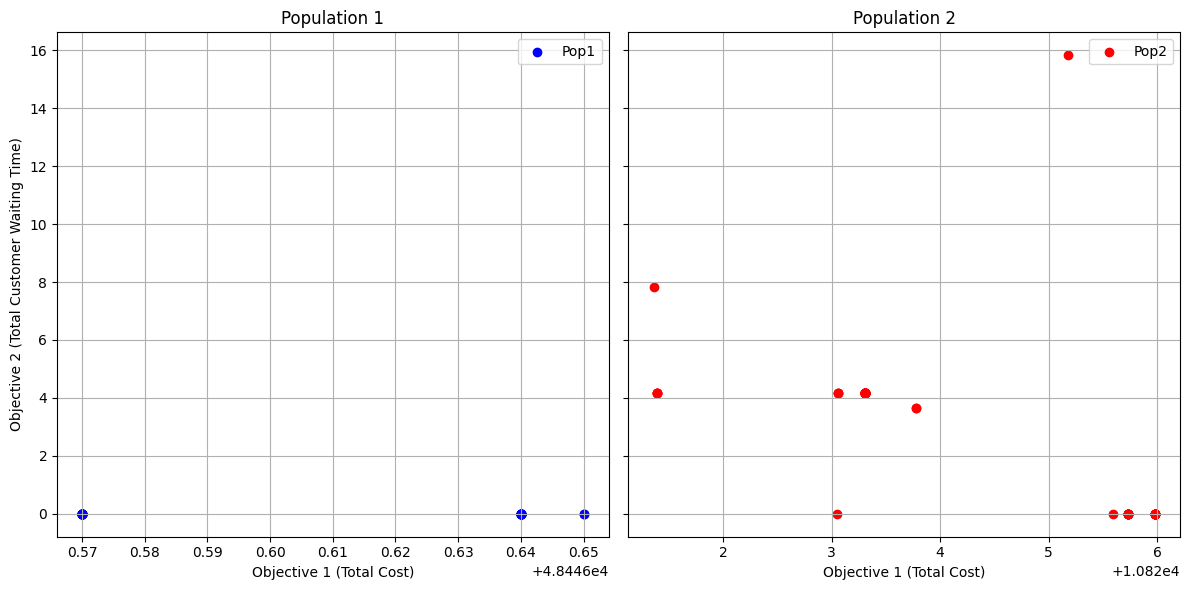

In [78]:
plot_subplot_scatter(pop_nsga)

C:\Users\TRAM\AppData\Local\Temp\ipykernel_11604\2627566359.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


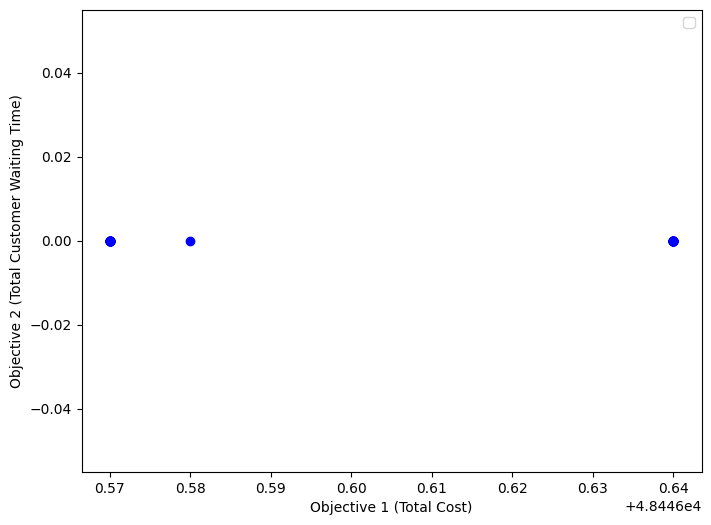

In [81]:
plot_population_scatter(initial_pop)

3


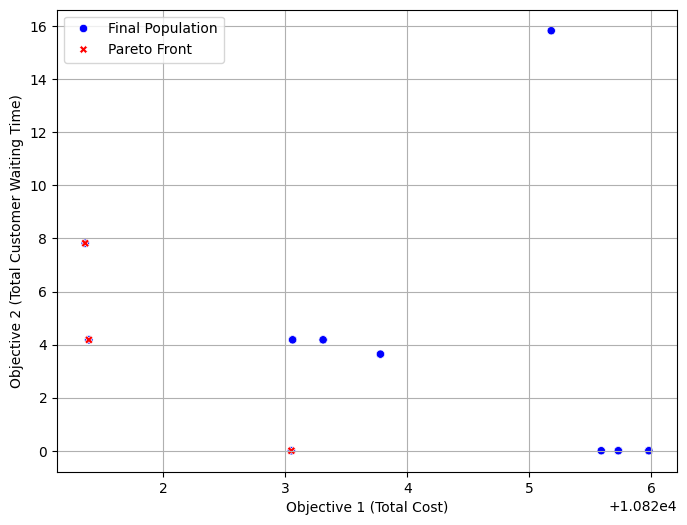

In [85]:
pareto_front_nsga = problem.get_distinct_solutions(pop_nsga)
print(len(pareto_front_nsga))
plot_2_population_scatter(pop_nsga, pareto_front_nsga)

In [92]:
pareto_front_nsga[2].sub_routes

[[1, 4, 28, 35, 1],
 [1, 3, 7, 26, 30, 1],
 [1, 9, 12, 5, 22, 15, 34, 38, 32, 1],
 [1, 2, 33, 24, 1],
 [1, 10, 11, 13, 18, 29, 14, 25, 1],
 [1, 21, 6, 27, 19, 36, 31, 1],
 [1, 8, 17, 23, 20, 16, 1]]

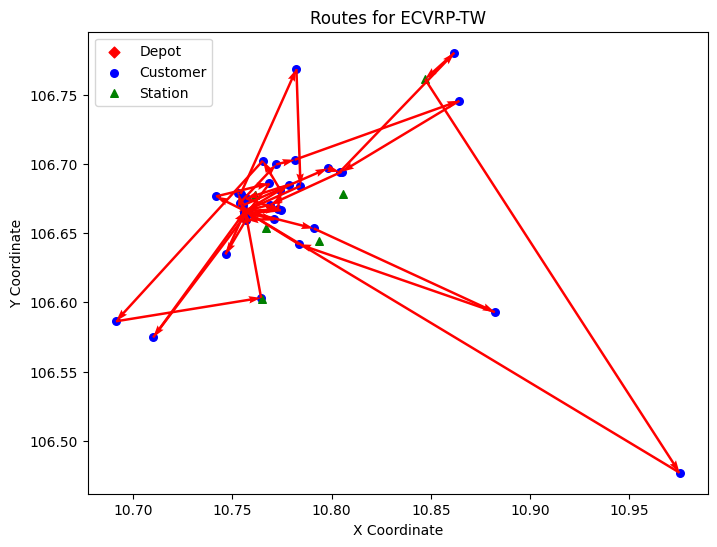

In [95]:
plot_evrp(problem, routes=pareto_front_nsga[0])

C:\Users\TRAM\AppData\Local\Temp\ipykernel_14696\651657811.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


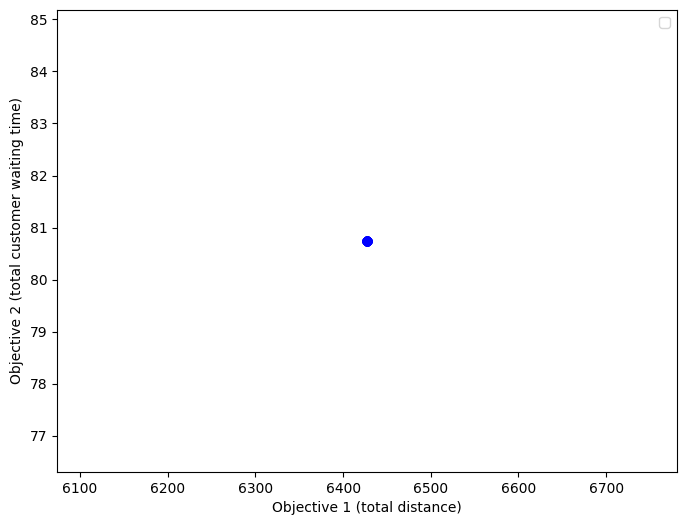

80


In [14]:
plot_population_scatter(pop_spea)
print(len(pop_spea))

4


C:\Users\TRAM\AppData\Local\Temp\ipykernel_14696\651657811.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


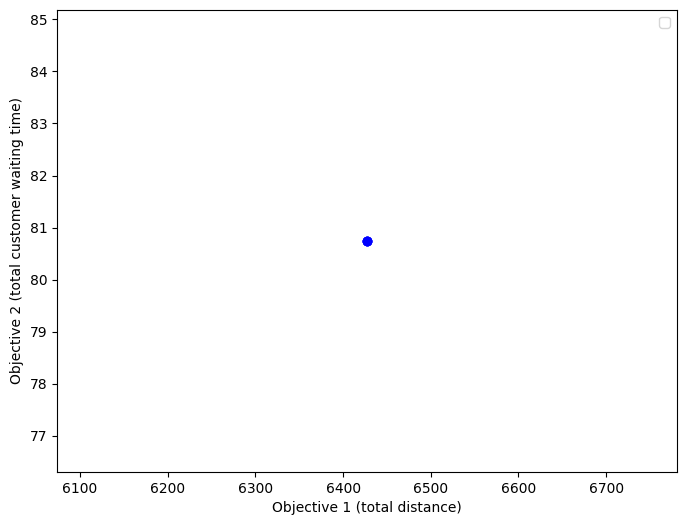

In [15]:
pareto_front_spea = problem.get_distinct_solutions(pop_spea)
print(len(pareto_front_spea))
plot_population_scatter(pareto_front_spea)

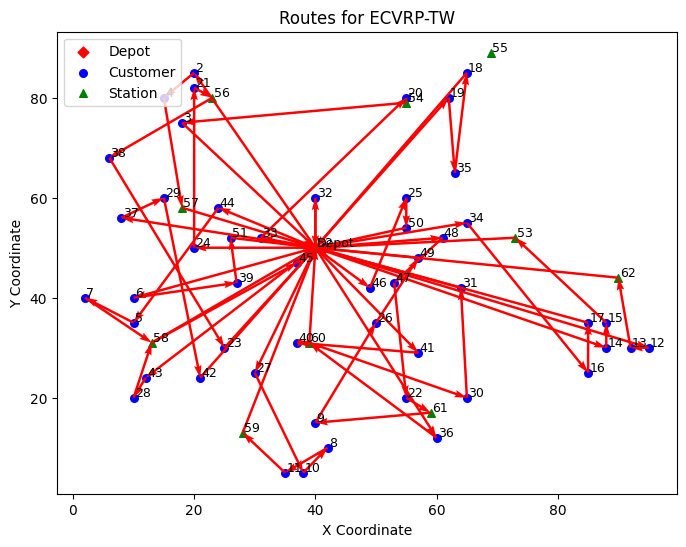

In [16]:
plot_evrp(problem, routes=pareto_front_nsga[1], label=True)